In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd
from flarefly.data_handler import DataHandler
from flarefly.fitter import F2MassFitter

/home/fchinu/.virtualenv/ml/lib/python3.8/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [17]:
df = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/ML/Application/pt1_2/Data_pT_1_2_ModelApplied.parquet.gzip")
df = df.query("ML_output_Prompt > 0.4 and ML_output_Bkg < 0.005")
data = DataHandler(data=df,
                   var_name="fM")


In [12]:
# define PDFs lists
signal_pdfs = ["gaussian", "gaussian"]
background_pdfs = ["powlaw"]

# define the ids
DplusId = 0 # because signal_pdfs[gaussian_id] = "gaussian"
DsId = 1 # because signal_pdfs[gaussian_id] = "gaussian"
expo_id = 0     # because background_pdfs[expo_id] = "expo"

In [13]:
fitter = F2MassFitter(data_handler=data,
                      name_signal_pdf=signal_pdfs,
                      name_background_pdf=background_pdfs,
                      name=f"{background_pdfs[expo_id]}_{signal_pdfs[DplusId]}_{signal_pdfs[DsId]}")

In [14]:
fitter.set_particle_mass(DsId, mass = 1.968)
fitter.set_particle_mass(DplusId, mass = 1.868)
fitter.set_signal_initpar(DsId, "sigma", 0.2, limits=[0.05, 0.3])
fitter.set_signal_initpar(DplusId, "sigma", 0.2, limits=[0.05, 0.3])

fitter.set_background_initpar(expo_id, "lam", -1.5)

In [18]:
fitter.mass_zfit()

NameAlreadyTakenError: Another parameter is already named powlaw_gaussian_gaussian_mu_signal0. Use a different, unique one.

: 

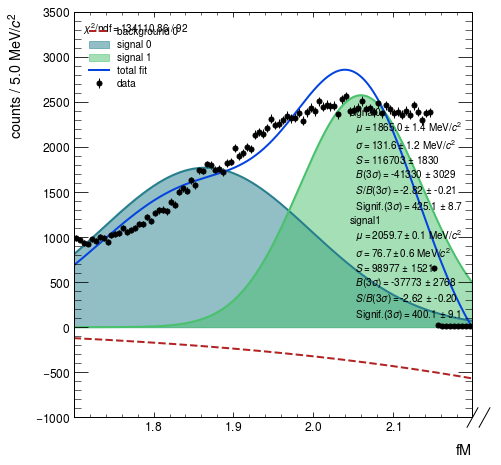

In [16]:
plot_mass_fit = fitter.plot_mass_fit(style="ATLAS",
                    show_extra_info=True,
                    extra_info_loc=['upper left', 'center right'])